In [1]:
import importlib
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
from multi_loc import covariance, assimilate

In [3]:
%matplotlib inline

In [4]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [5]:
dimension = 2**4
rho0 = 5
dx = 1
H = np.eye(dimension)[::2]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

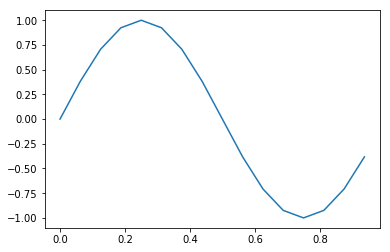

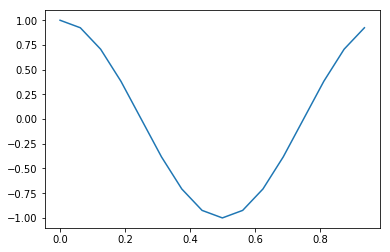

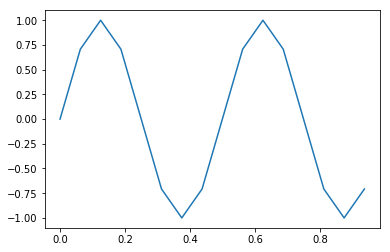

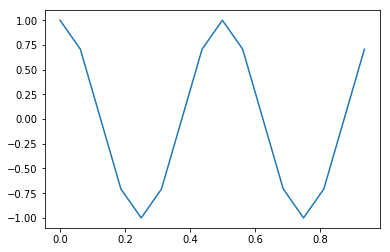

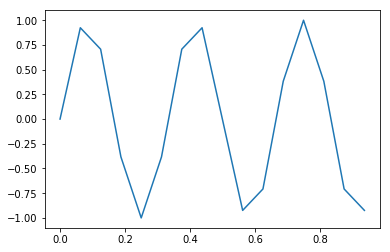

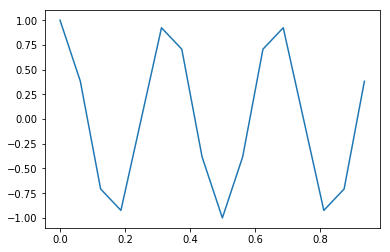

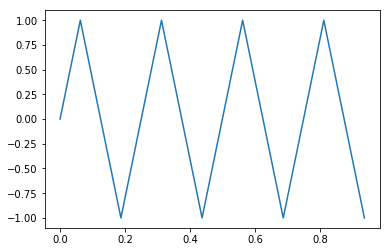

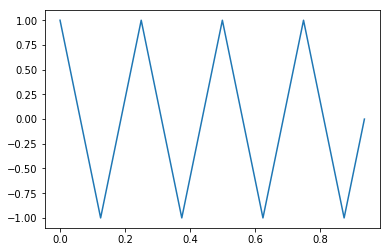

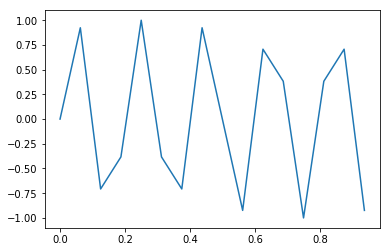

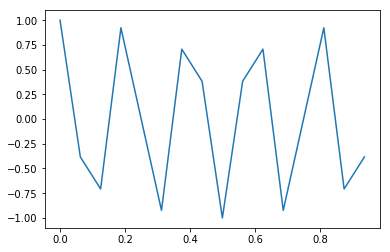

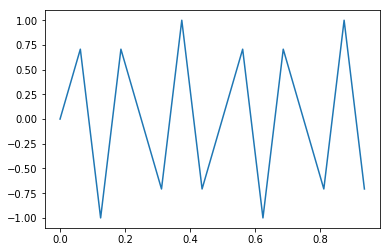

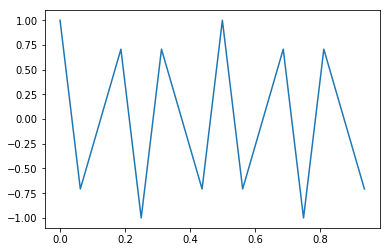

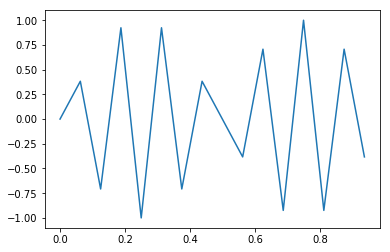

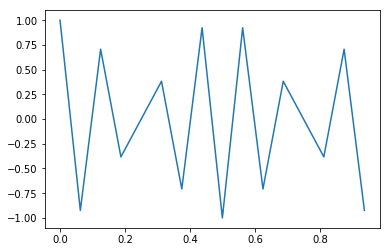

In [6]:
x = np.arange(dimension)/dimension
for n in range(round(dimension/2 - 1)):
    n += 1
    y = np.sin(2*np.pi*x*n)
    plt.figure()
    plt.plot(x, y)
    
    y = np.cos(2*np.pi*x*n)
    plt.figure()
    plt.plot(x, y)

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


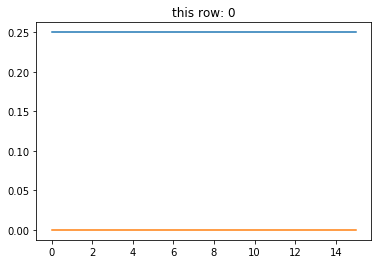

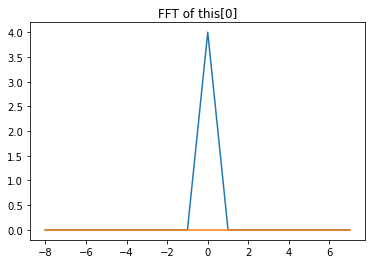

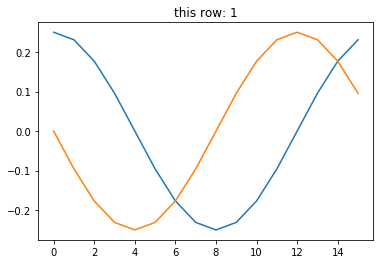

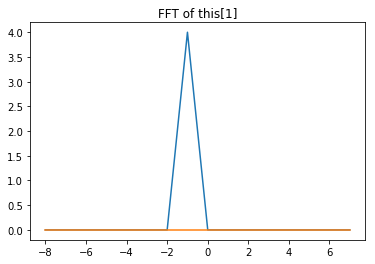

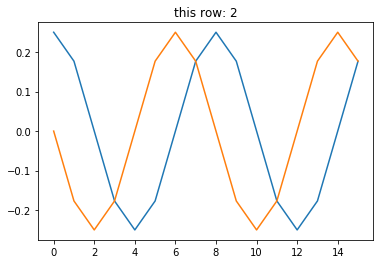

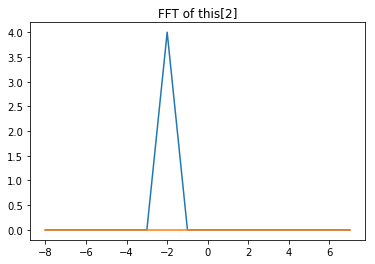

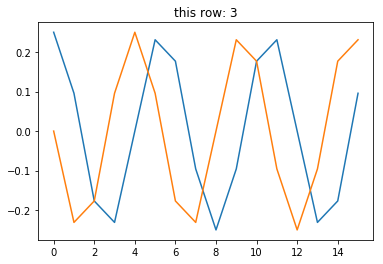

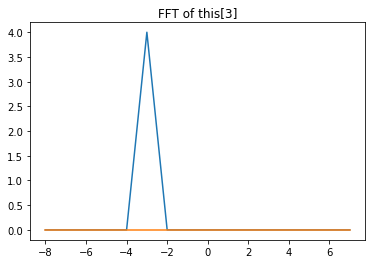

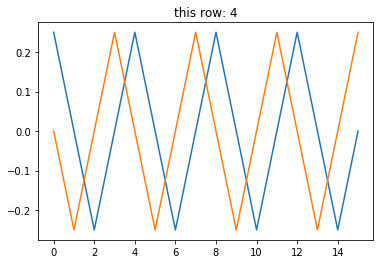

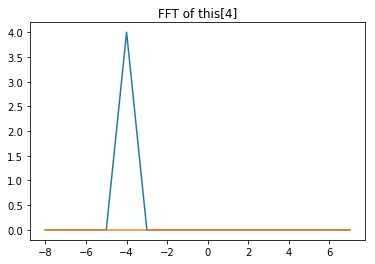

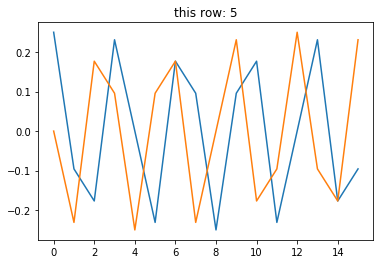

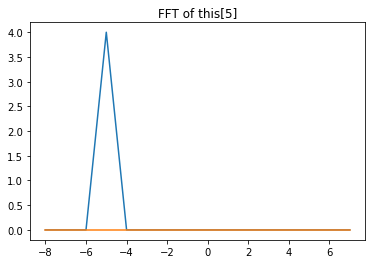

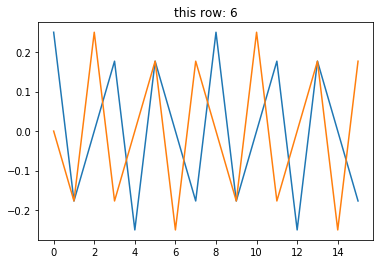

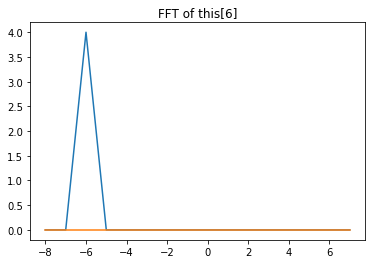

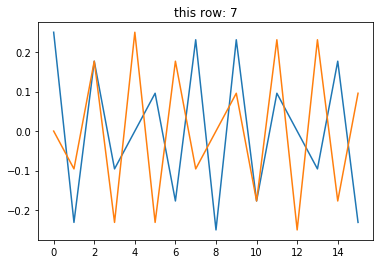

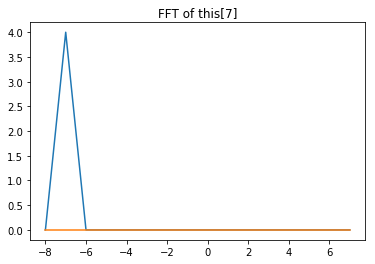

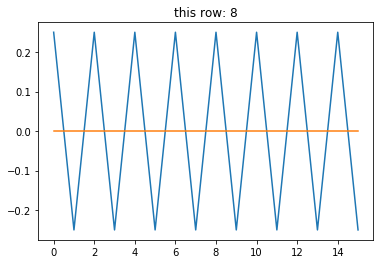

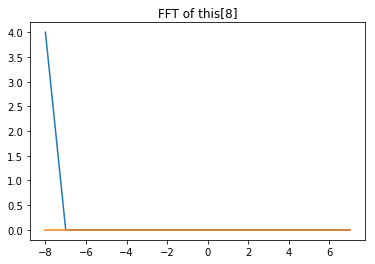

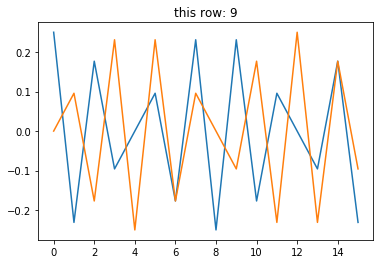

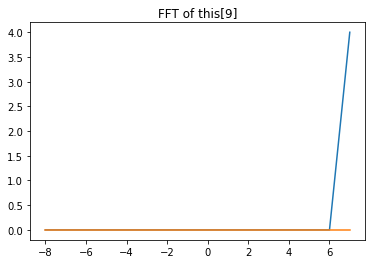

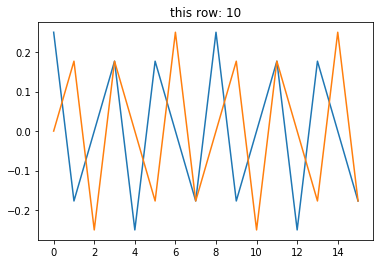

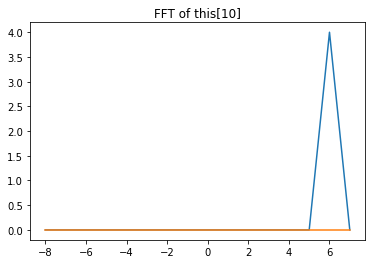

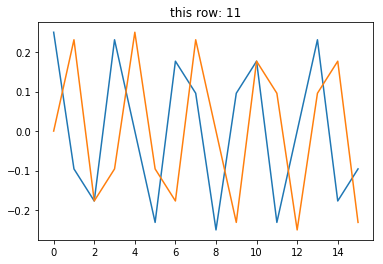

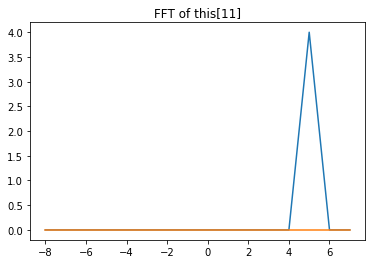

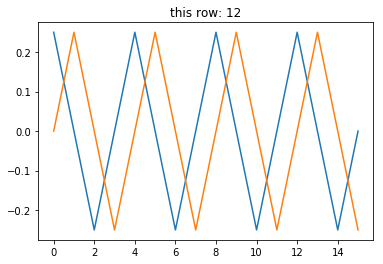

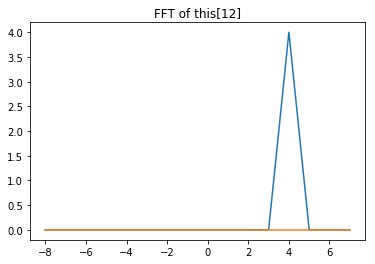

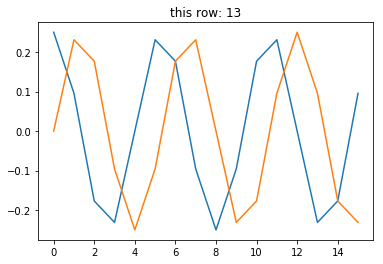

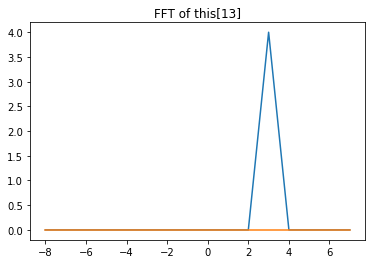

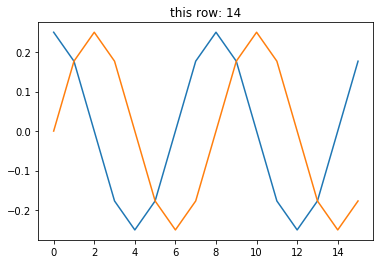

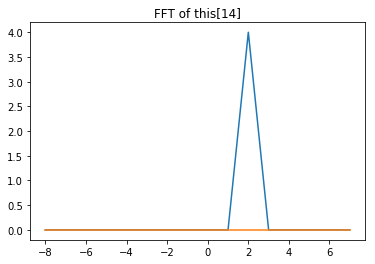

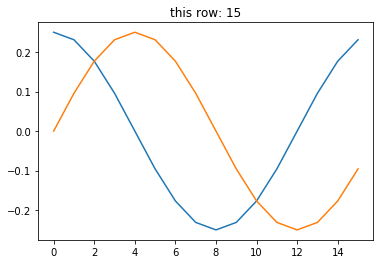

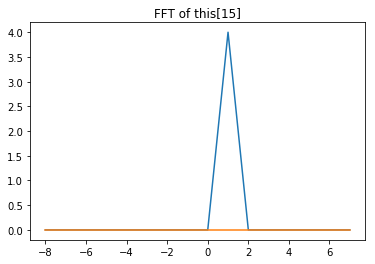

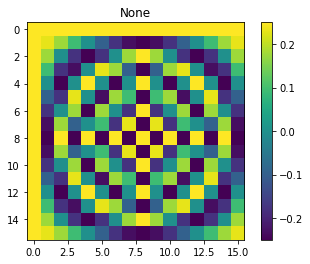

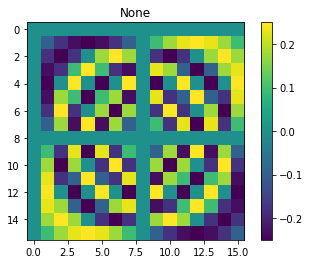

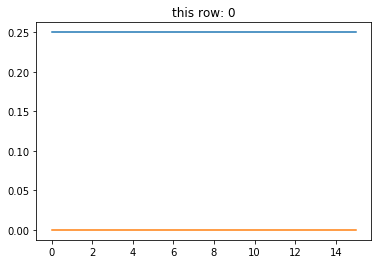

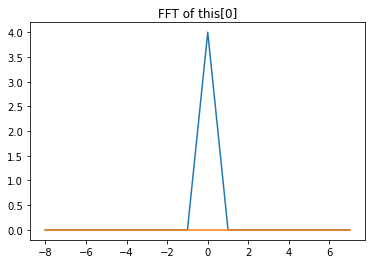

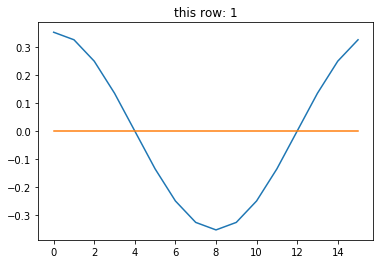

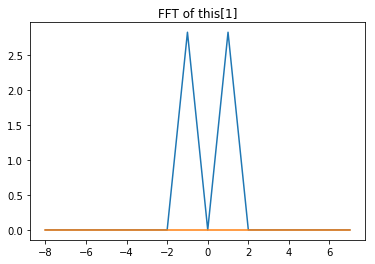

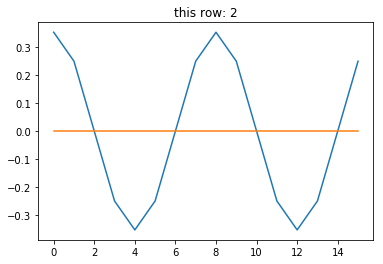

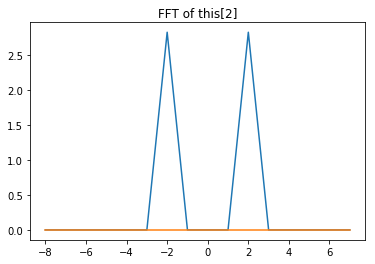

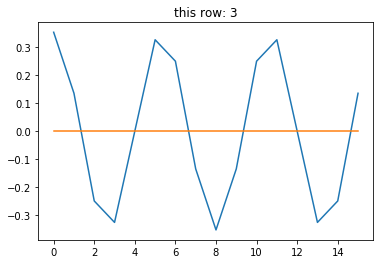

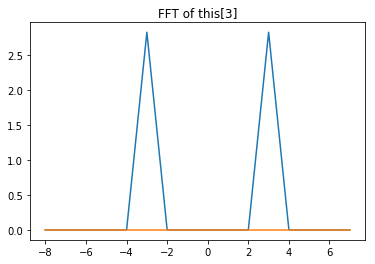

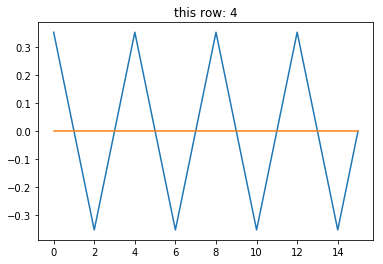

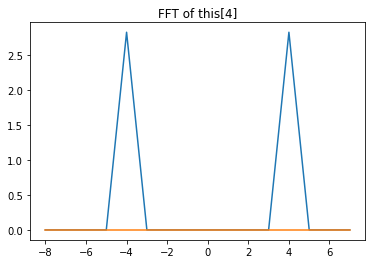

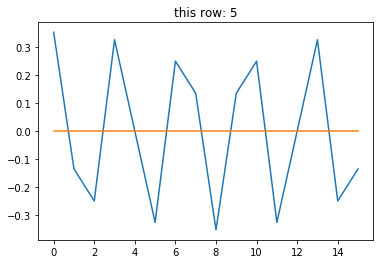

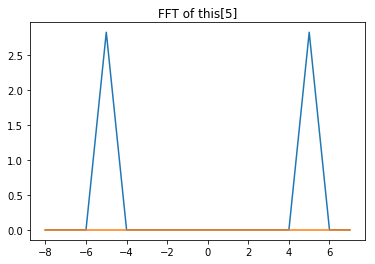

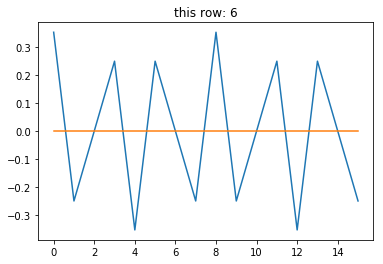

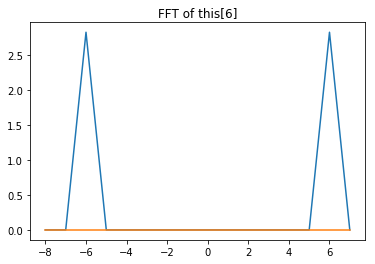

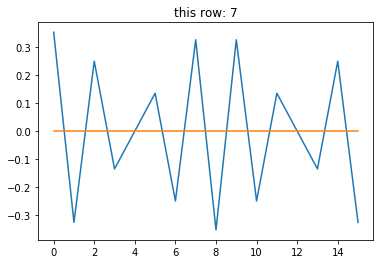

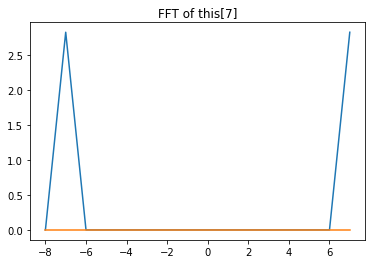

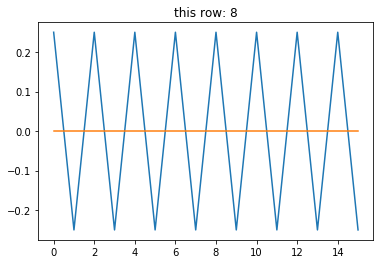

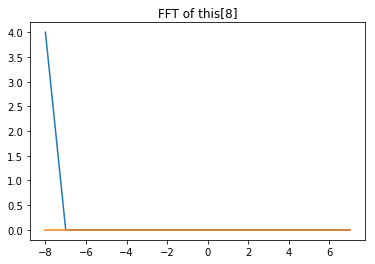

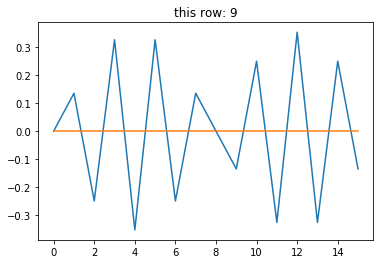

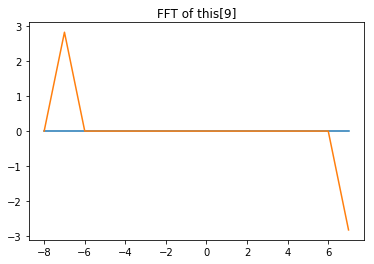

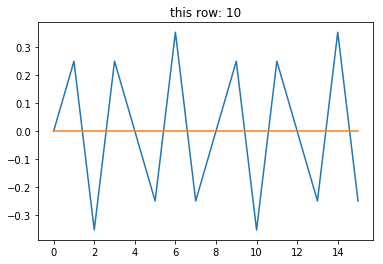

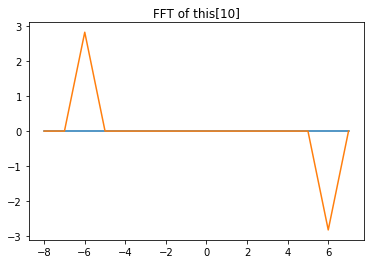

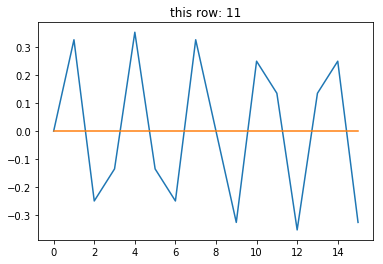

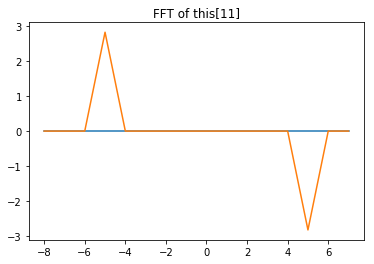

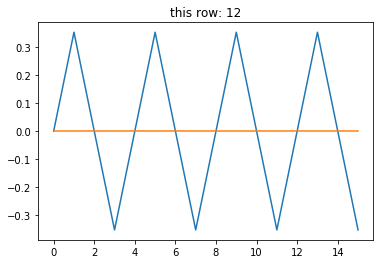

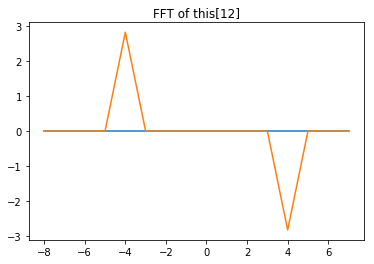

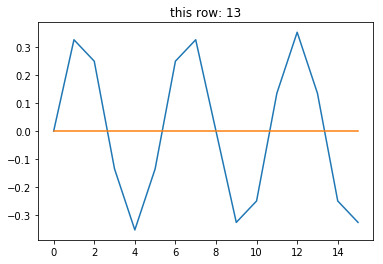

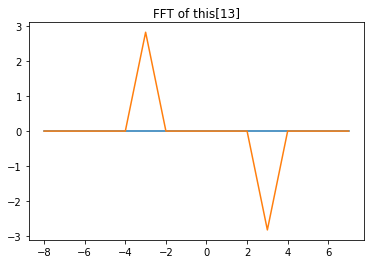

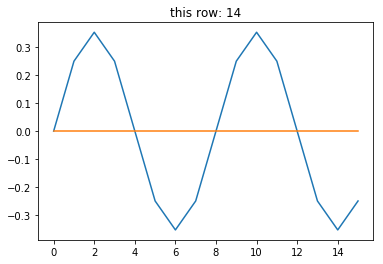

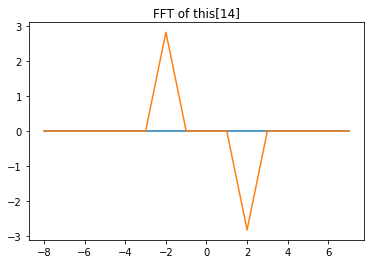

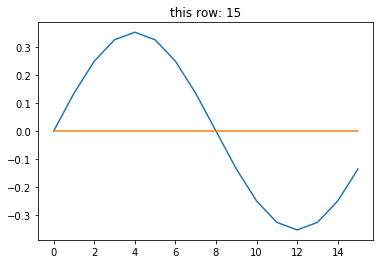

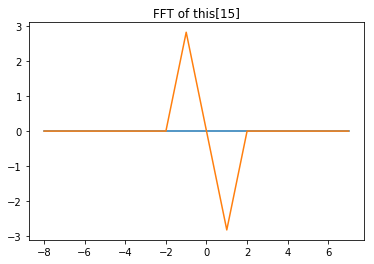

In [8]:
num = dimension
dim = dimension
eig_vec_fft = np.fft.fft(np.eye(dim))/np.sqrt(dim)
# eig_vec_fft = np.fft.fftshift(eig_vec_fft, axes=-1)
k = covariance.return_waves(dim)
k = np.fft.fftshift(k)
for ii in range(round(num)):
    plt.figure()
    plt.plot(eig_vec_fft[:, ii].real)
    plt.plot(eig_vec_fft[:, ii].imag)
    plt.title(f'this row: {ii}')
    
    v_fft = np.fft.fft(eig_vec_fft[:, ii])
    v_fft = np.fft.fftshift(v_fft)
    plt.figure()
    plt.plot(k, v_fft.real)
    plt.plot(k, v_fft.imag)
    plt.title(f'FFT of this[{ii}]')
    
imshow(eig_vec_fft.real)
imshow(eig_vec_fft.imag)
this_copy = eig_vec_fft.copy()



eig_vec_fft[:, 1:int(dim/2)] = (this_copy[:, 1:int(dim/2)] + this_copy[:, :int(dim/2):-1])/np.sqrt(2)
eig_vec_fft[:, int(dim/2) + 1:] = -(this_copy[:, int(dim/2) - 1:0:-1] - this_copy[:, int(dim/2) + 1:])/(np.sqrt(2) * 1j)

eig_vec_fft = eig_vec_fft.real

for ii in range(round(num)):
    plt.figure()
    plt.plot(eig_vec_fft[:, ii].real)
    plt.plot(eig_vec_fft[:, ii].imag)
    plt.title(f'this row: {ii}')
    
    v_fft = np.fft.fft(eig_vec_fft[:, ii])
    v_fft = np.fft.fftshift(v_fft)
    plt.figure()
    plt.plot(k, v_fft.real)
    plt.plot(k, v_fft.imag)
    plt.title(f'FFT of this[{ii}]')

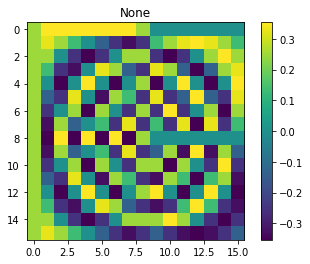

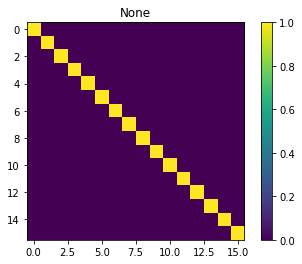

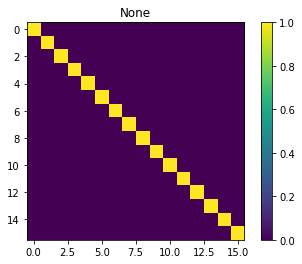

In [9]:
imshow(eig_vec_fft)
imshow(eig_vec_fft @ eig_vec_fft.T)
imshow(eig_vec_fft.T @ eig_vec_fft)

In [51]:
eig_val, eig_vec, P, sort_ind = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_exp_1d,
    return_Corr=True,
    return_sort_ind=True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
# eig_vec = eig_vec.real + eig_vec.imag
P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

returned = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

P_sqrt, P_inv_sqrt = returned[:2]
R_sqrt, R_inv_sqrt = returned[2:4]
U, S, VT = returned[4:7]
Tx, Tx_inv, Ty, Ty_inv = returned[7:]

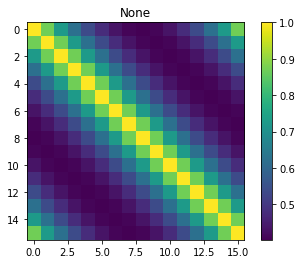

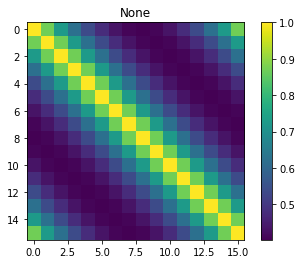

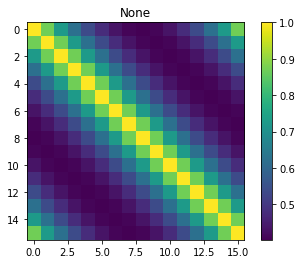

In [52]:
sort_fft = np.argsort(sort_ind)
eig_val_fft = eig_val[sort_fft]
imshow(P)
imshow((eig_vec @ np.diag(eig_val) @ eig_vec.conj().T).real)
imshow(eig_vec_fft @ np.diag(eig_val_fft) @ eig_vec_fft.T)

Text(0.5,0.98,'Eigenvalues P')

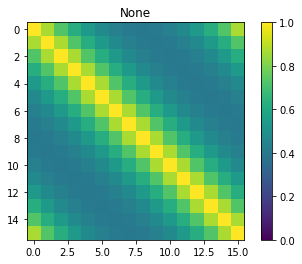

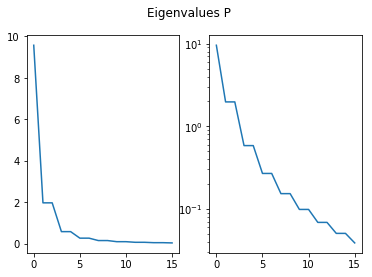

In [53]:
imshow(P, vmin=0)

fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val)
ax[1].semilogy(eig_val)
plt.suptitle('Eigenvalues P')

In [54]:
%matplotlib inline

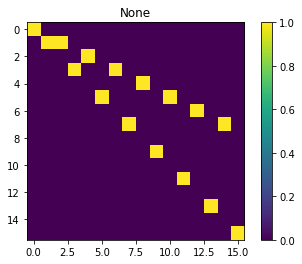

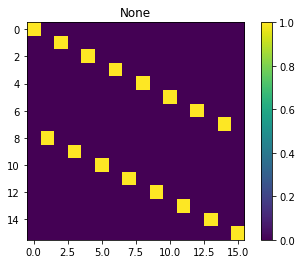

In [57]:
m = dimension
perm = np.eye(m)
half = round(m/2)
I = np.eye(m)
perm[:, ::2] = I[:, :half]
imshow(perm)
perm[:, 1::2] = I[:, half:]
imshow(perm)

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


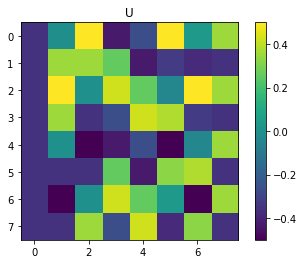

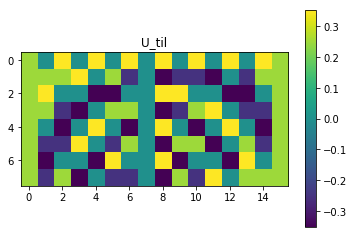

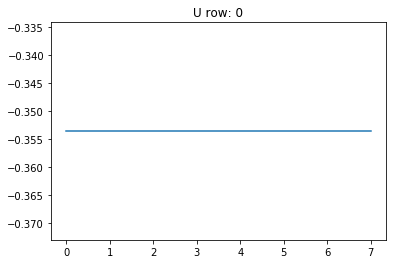

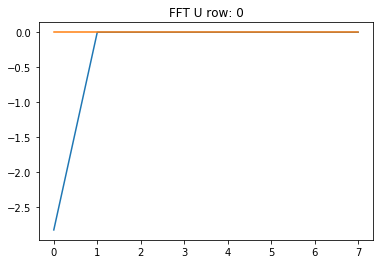

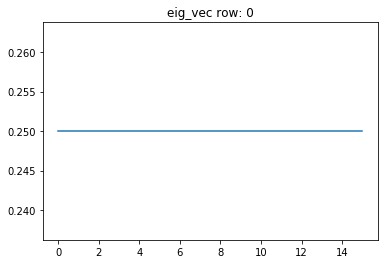

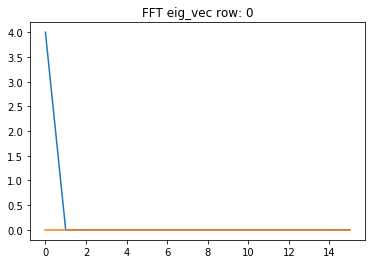

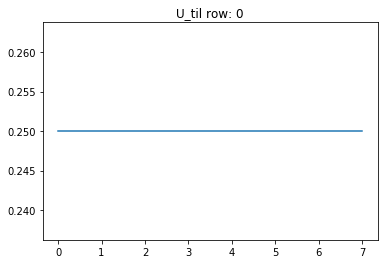

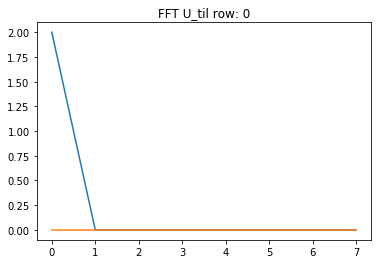

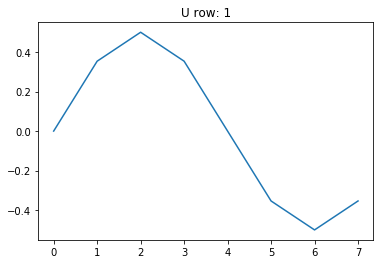

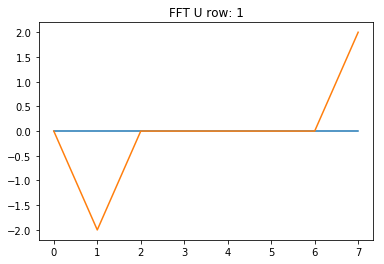

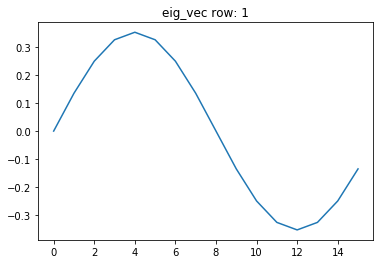

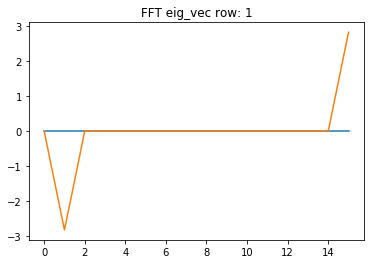

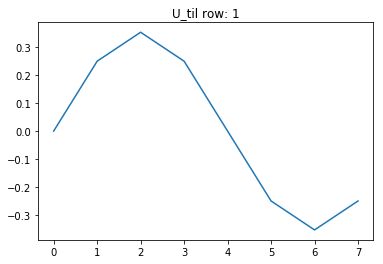

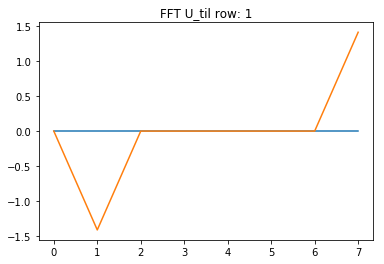

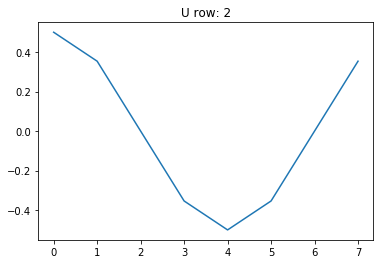

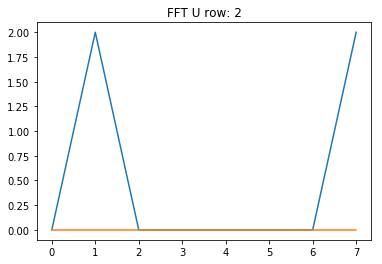

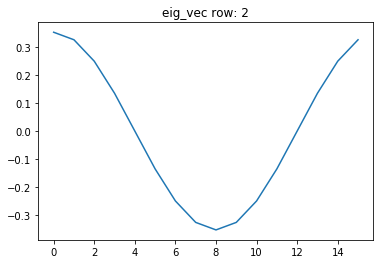

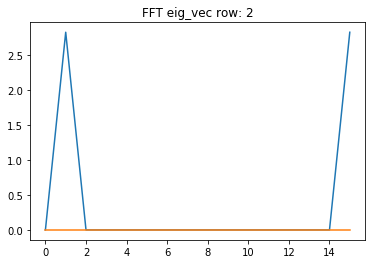

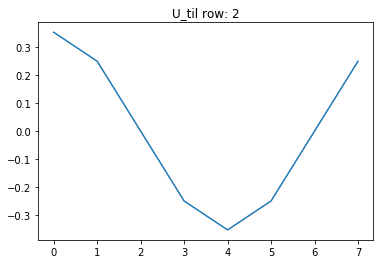

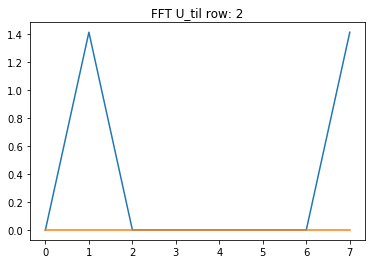

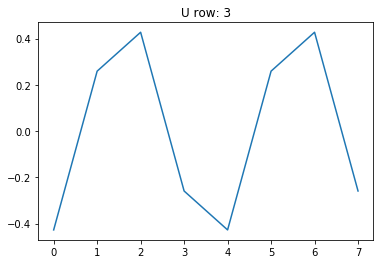

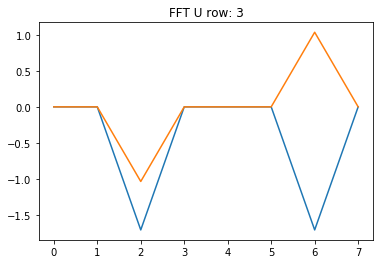

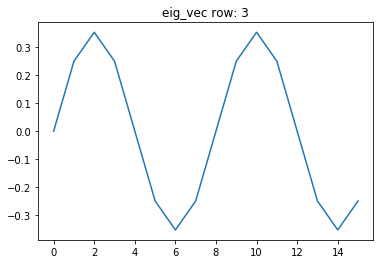

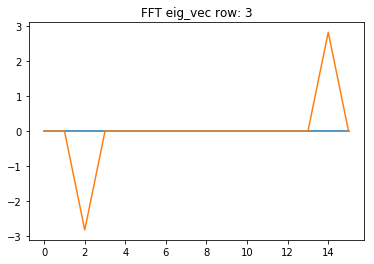

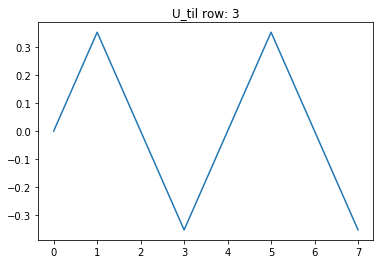

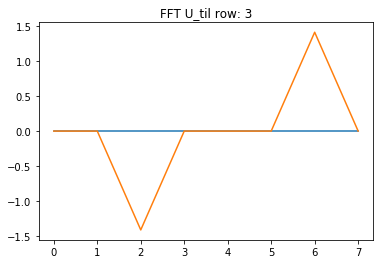

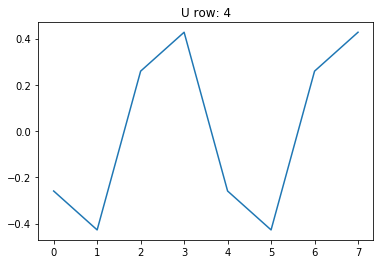

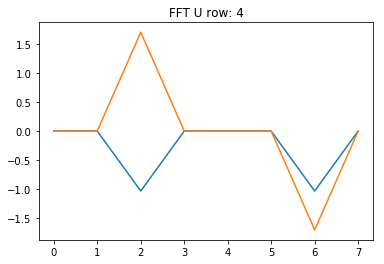

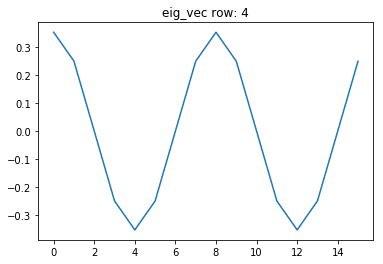

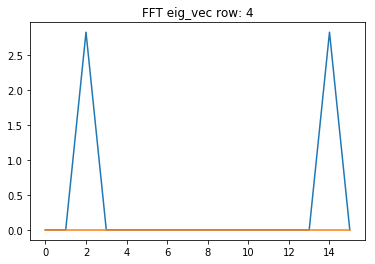

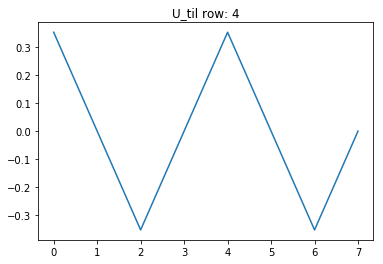

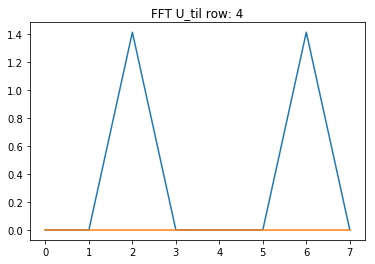

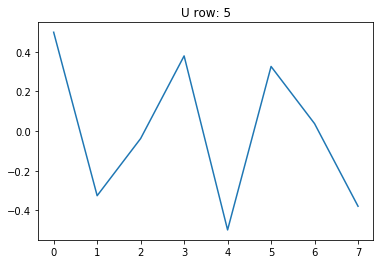

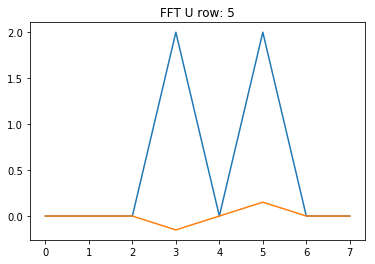

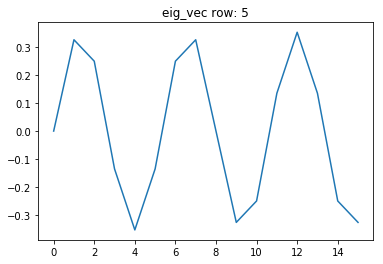

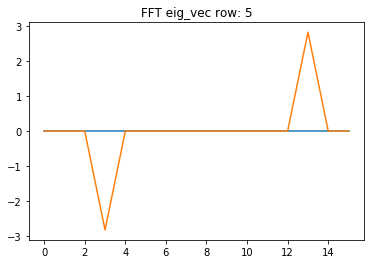

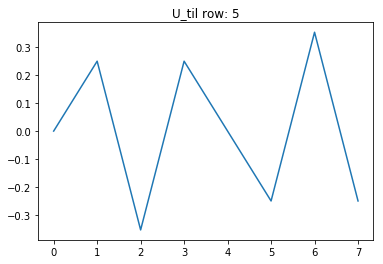

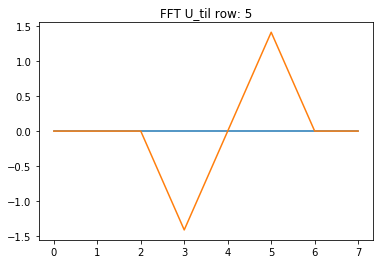

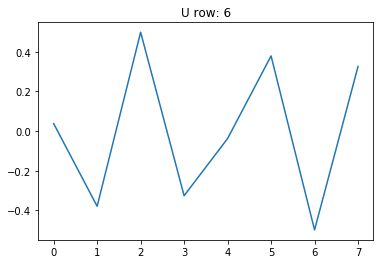

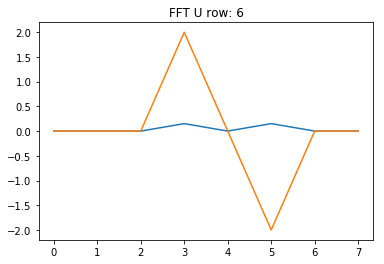

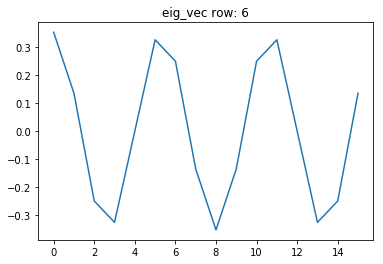

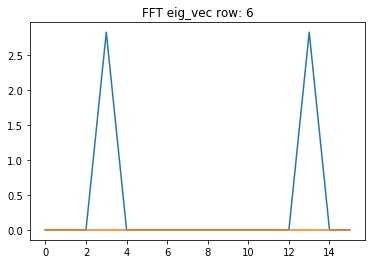

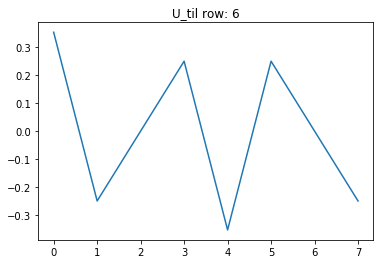

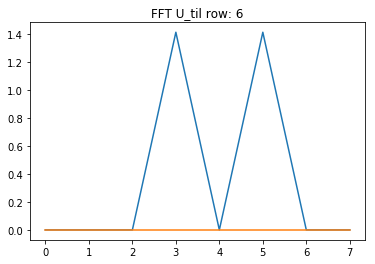

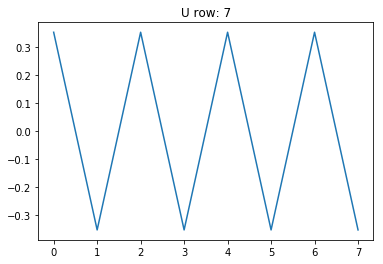

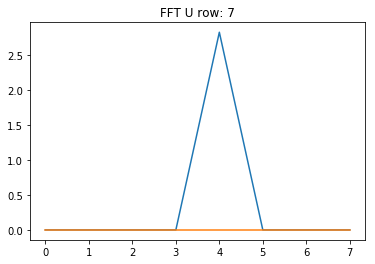

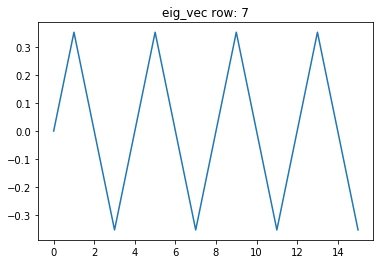

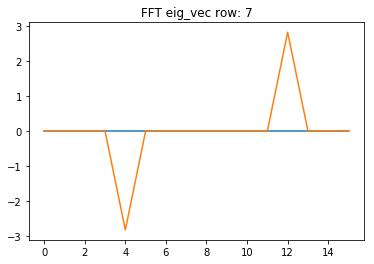

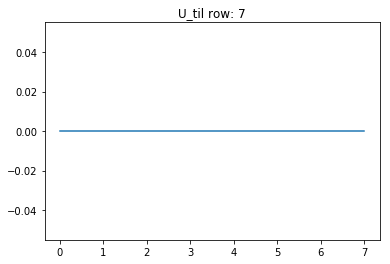

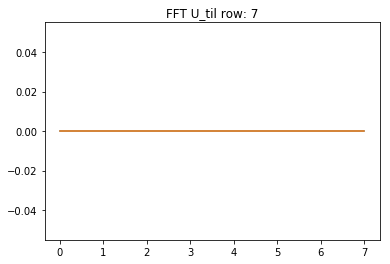

In [65]:
num_v = 11
num_u = 8
imshow(U, 'U')
# U_til = H @ eig_vec[:, :round(dimension/2)]
U_til = H @ eig_vec
imshow(U_til, 'U_til')

for ii in range(num_u):   
    plt.figure()
    plt.plot(U[:, ii])
    plt.title(f'U row: {ii}')
    
    u_fft = np.fft.fft(U[:, ii])
    plt.figure()
    plt.plot(u_fft.real)
    plt.plot(u_fft.imag)
    plt.title(f'FFT U row: {ii}')
    
    this = eig_vec[:, ii]
    plt.figure()
    plt.plot(this)
    plt.title(f'eig_vec row: {ii}')
    
    u_fft = np.fft.fft(this)
    plt.figure()
    plt.plot(u_fft.real)
    plt.plot(u_fft.imag)
    plt.title(f'FFT eig_vec row: {ii}')
    
    
    plt.figure()
    plt.plot(U_til[:, ii])
    plt.title(f'U_til row: {ii}')
    
    u_fft = np.fft.fft(U_til[:, ii])
    plt.figure()
    plt.plot(u_fft.real)
    plt.plot(u_fft.imag)
    plt.title(f'FFT U_til row: {ii}')


# VT_til = eig_vec.T

# imshow(VT, 'VT')
# imshow(VT_til.real, 'TV_til')

# for ii in range(round(num_v)):
#     x = np.arange(dimension)/dimension*2*np.pi
#     truth = np.cos(x*ii)
    
#     plt.figure()
#     plt.plot(VT[ii])
#     plt.title(f'VT row: {ii}')
    
#     v_fft = np.fft.fft(VT[ii])
#     v_fft = np.fft.fftshift(v_fft)
#     plt.figure()
#     plt.plot(v_fft.real)
#     plt.plot(v_fft.imag)
#     plt.title(f'FFT of VT[{ii}]')
    
#     plt.figure()
#     plt.plot(VT_til[ii].real)
#     plt.plot(VT_til[ii].imag)
#     plt.title(f'VT_till row: {ii}')
    
#     v_fft = np.fft.fft(VT_til[ii])
#     v_fft = np.fft.fftshift(v_fft)
#     plt.figure()
#     plt.plot(v_fft.real)
#     plt.plot(v_fft.imag)
#     plt.title(f'FFT of VT_til[{ii}]')

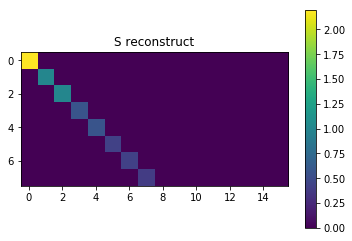

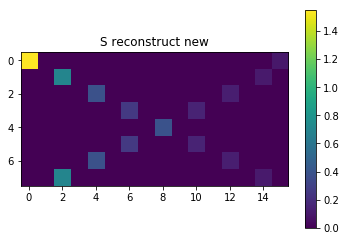

In [38]:
S_reconst_til = U_til.T @ H @ P_sqrt @ VT_til.T
S_reconst = U.T @ H @ P_sqrt @ VT.T
imshow(S_reconst, 'S reconstruct')
imshow(S_reconst_til, 'S reconstruct new')


In [187]:
%matplotlib inline

In [188]:
dimension = 100
rho0 = 10
dx = 1
H = np.eye(dimension)[::2]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

In [190]:
eig_val, eig_vec, P = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_sqd_exp_1d,
    return_Corr = True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
eig_vec = eig_vec.real + eig_vec.imag
P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

returned = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

P_sqrt, P_inv_sqrt = returned[:2]
R_sqrt, R_inv_sqrt = returned[2:4]
U, S, VT = returned[4:7]
Tx, Tx_inv, Ty, Ty_inv = returned[7:]

Text(0.5,0.98,'Eigenvalues P')

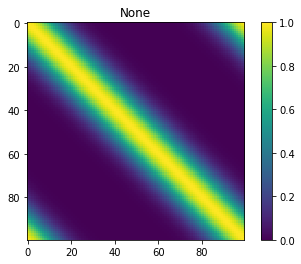

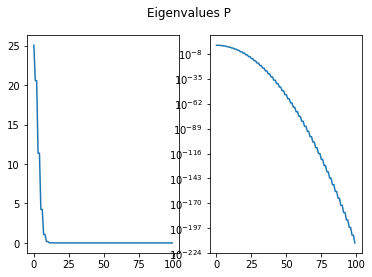

In [192]:
imshow(P, vmin=0)

fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val)
ax[1].semilogy(eig_val)
plt.suptitle('Eigenvalues P')

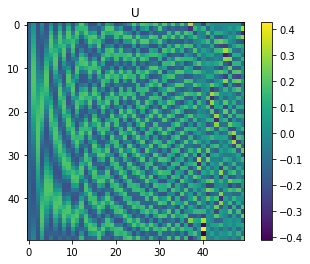

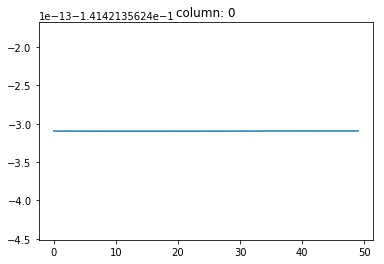

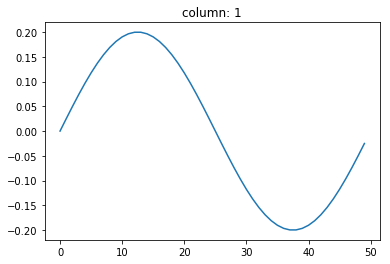

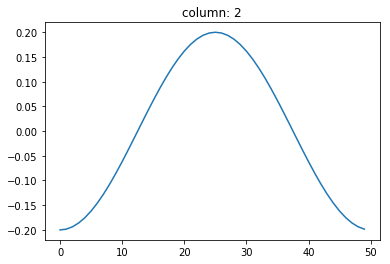

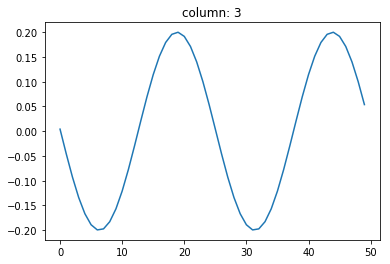

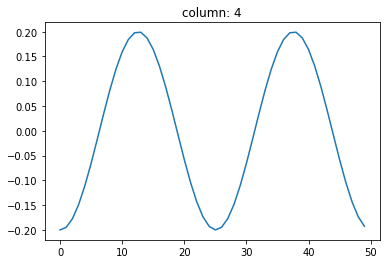

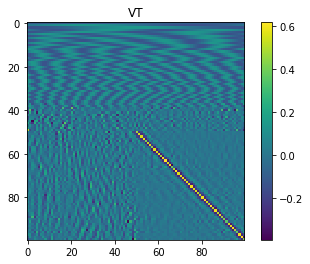

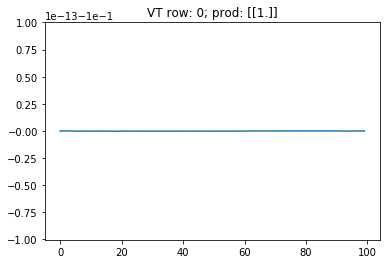

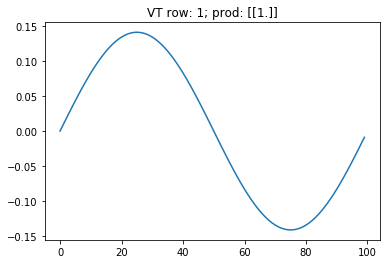

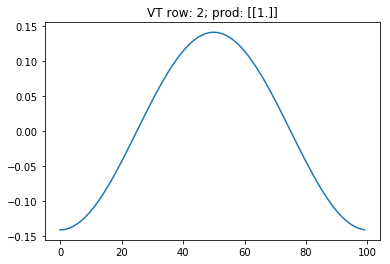

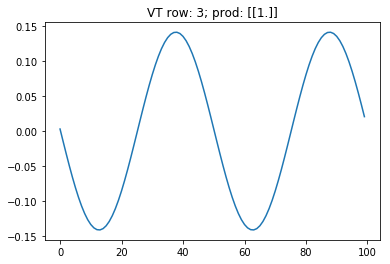

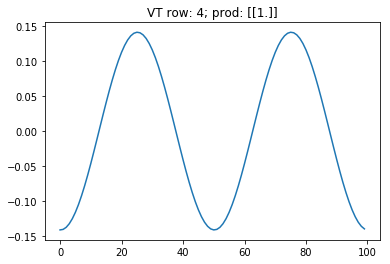

In [193]:
imshow(U, 'U')

for ii in range(5):   
    plt.figure()
    plt.plot(U[:, ii])
    plt.title(f'column: {ii}')
    
imshow(VT, 'VT')

for ii in range(5):
    x = np.arange(dimension)/dimension*2*np.pi
    truth = np.cos(x*ii)
    prod = VT[ii][None, :] @ VT[ii][None, :].conj().T
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT row: {ii}; prod: {prod}')

/anaconda3/envs/loc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


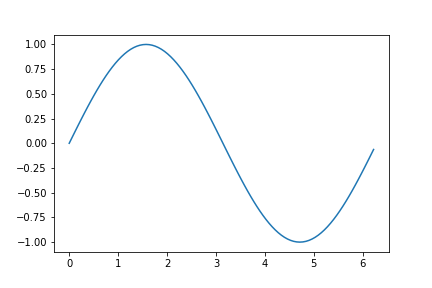

<IPython.core.display.Javascript object>


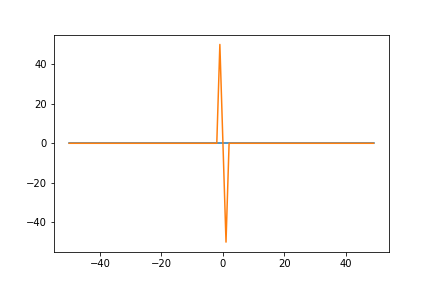

In [48]:
N = 100
x = np.arange(100)*2*np.pi/N
sin = np.sin(x)
fft = np.fft.fft(sin)
fft = np.fft.fftshift(fft)
k = np.arange(-N/2, N/2)

plt.figure()
plt.plot(x, sin)

plt.figure()
plt.plot(k, fft.real)
plt.plot(k, fft.imag)

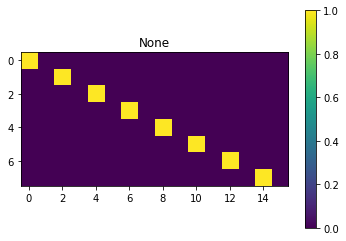

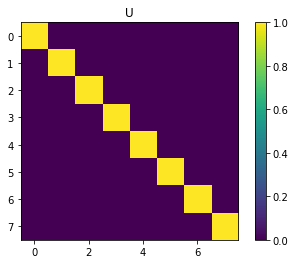

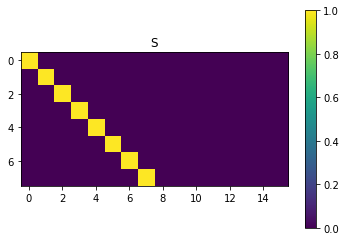

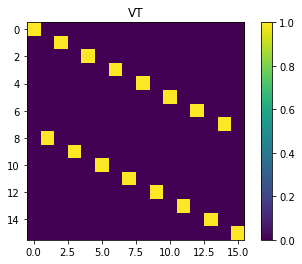

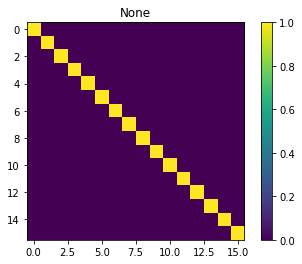

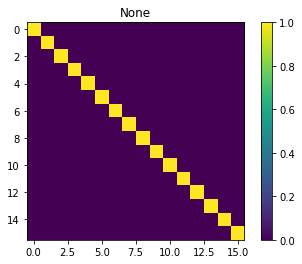

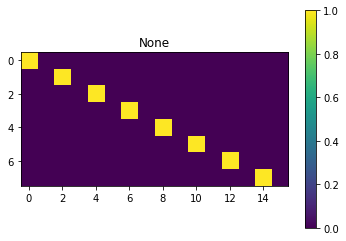

In [44]:
m = dimension
n = round(m/2)
H = np.eye(m)
H = H[::2]
imshow(H)

U = np.eye(n)
imshow(U, 'U')
S = np.eye(m)[:n]
imshow(S, 'S')
H_t = np.eye(m)
H_t = H_t[1::2]
VT = np.concatenate([H, H_t], axis=0)
imshow(VT, 'VT')
imshow(VT @ VT.T)
imshow(VT.T @ VT)

H_reconstruct = U @ S @ VT
imshow(H_reconstruct)

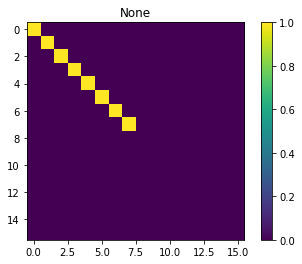

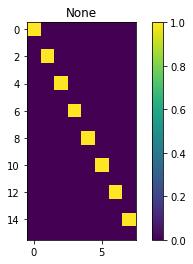

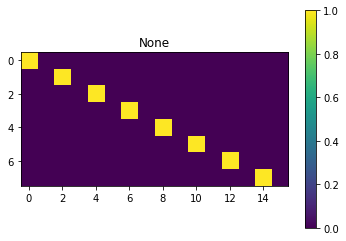

In [49]:
imshow(S.T @ S)
imshow(VT.T @ S.T)
imshow(S @ VT)

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


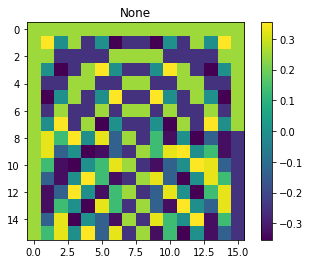

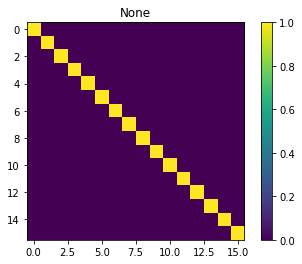

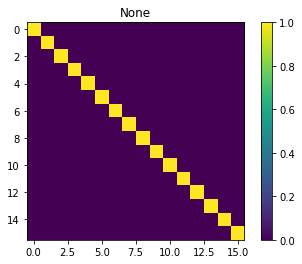

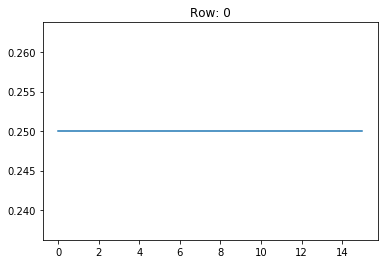

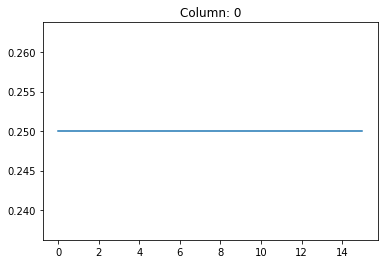

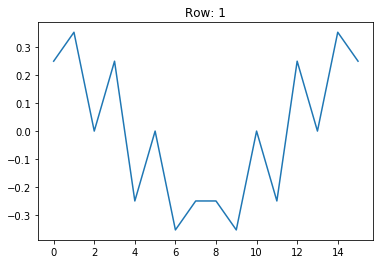

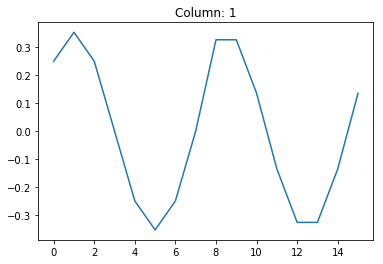

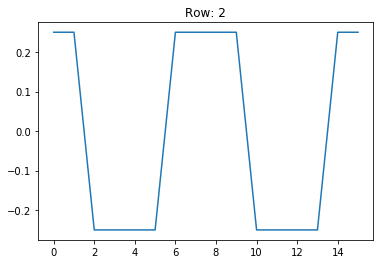

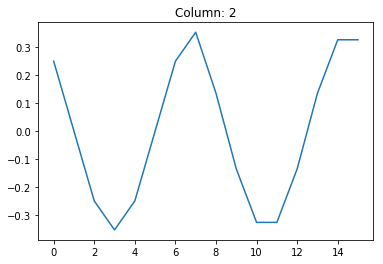

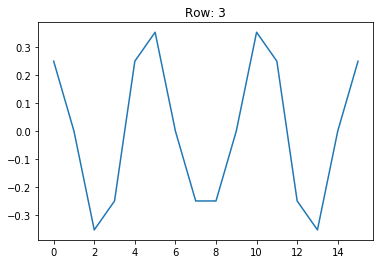

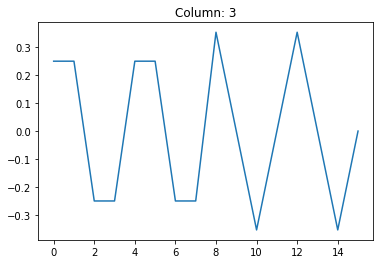

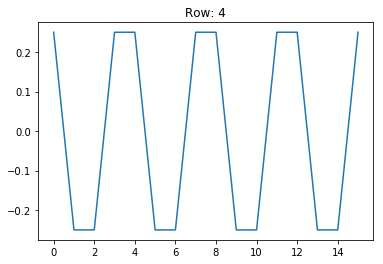

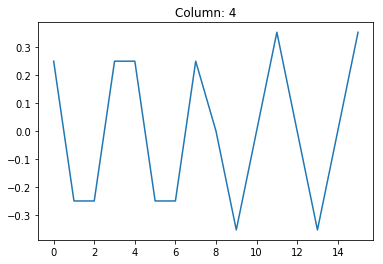

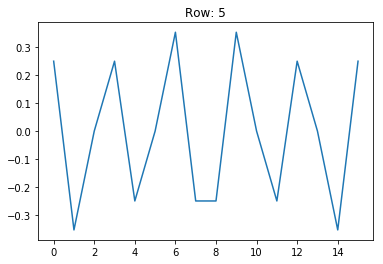

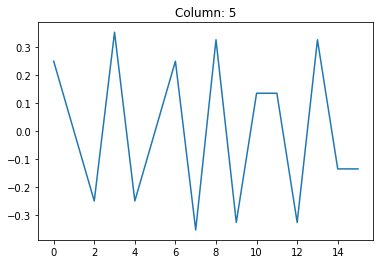

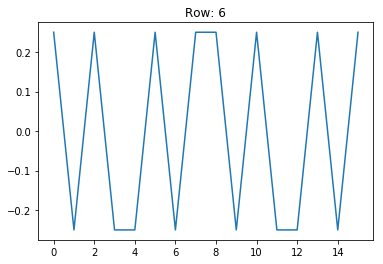

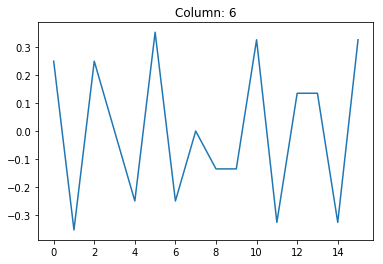

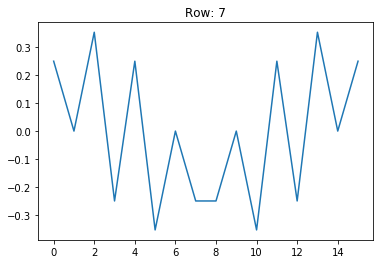

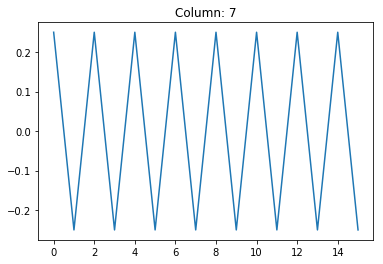

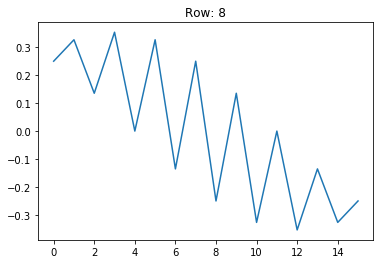

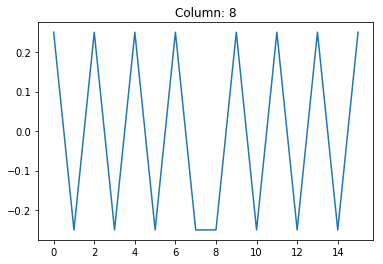

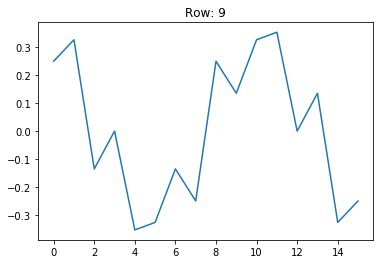

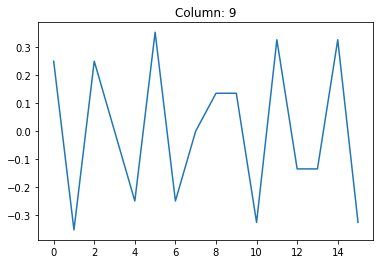

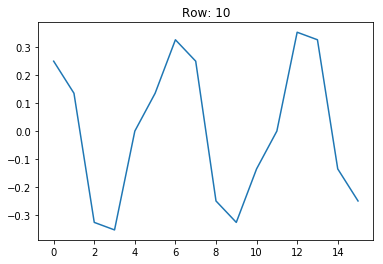

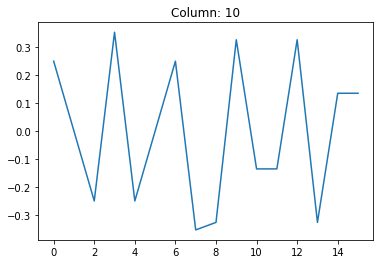

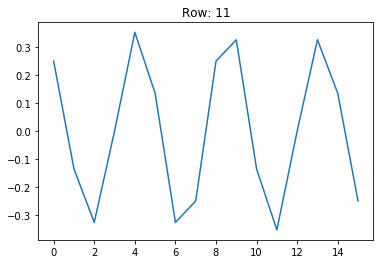

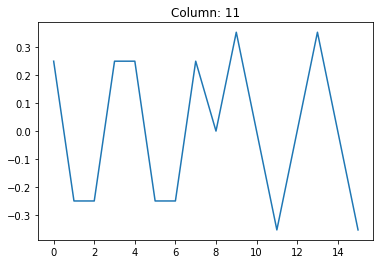

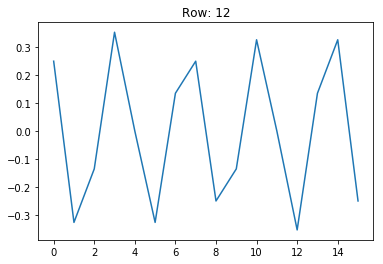

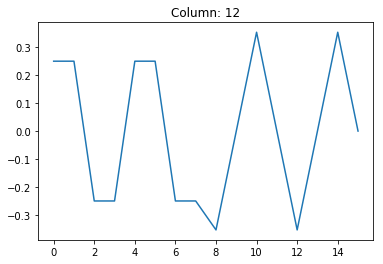

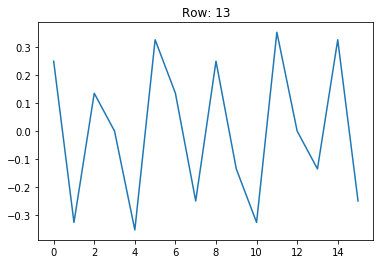

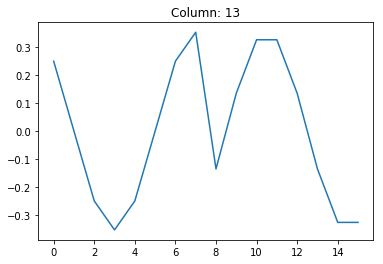

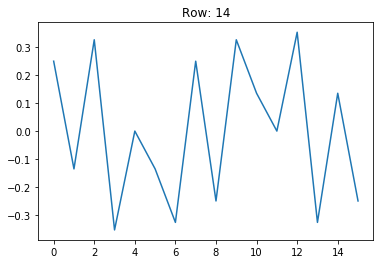

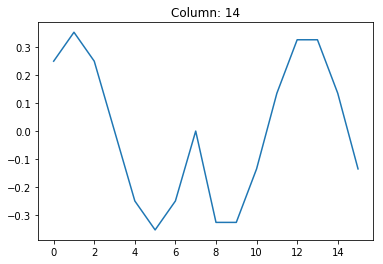

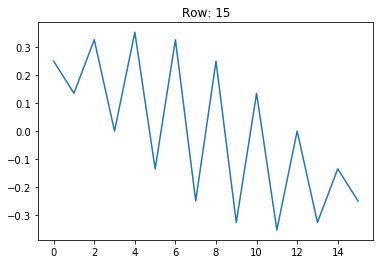

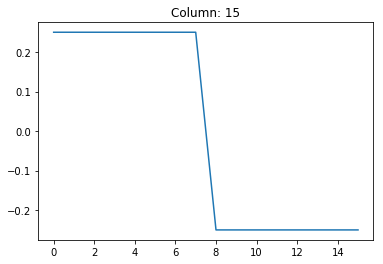

In [65]:
# this = S @ VT @ eig_vec
this = VT @ eig_vec

imshow(this)
imshow(this.T @ this)
imshow(this @ this.T)
for ii in range(this.shape[0]):
    plt.figure()
    plt.plot(this[ii])
    plt.title(f'Row: {ii}')
    
    plt.figure()
    plt.plot(this[:, ii])
    plt.title(f'Column: {ii}')